<a href="https://colab.research.google.com/github/lucianosilva-github/visaocomputacional/blob/master/Aula%2007/Visa%CC%83o_Computacional_Aula_07_SOLUCOES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **VISÃO COMPUTACIONAL - AULA 07**

**Objetivos da aula:**

*   conhecer o processo genérico de filtragem no domínio espacial
*   conhecer os filtros de blurring
*   conhecer o problema de ruído em imagens
*   conhecer o filtro de sharpening










**FILTRAGEM NO DOMÍNIO ESPACIAL**

A **filtragem no domínio espacial** ocorre com a aplicação de **filtros** (matrizes), posicionados sob cada pixel da imagem. Estes filtros, normalmente, são chamados de **kernels (ou núcleos)**. O resultado final do valor do pixel é calculado através de um **produto de convolução**.



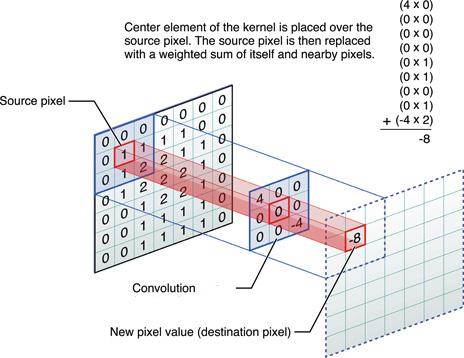

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.imread('convolution.png')
cv2_imshow(img)

Existem diversos problemas de Visão Computacional e Processamento de Imagens que podem ser resolvidos com o processo de produto de convolução.

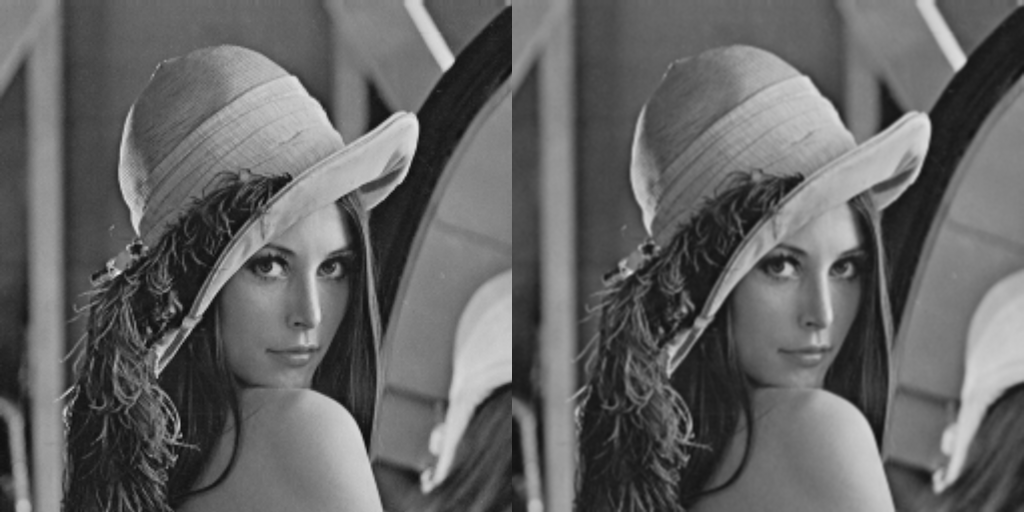

In [1]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.imread('lena.png',0)
kernel = np.ones((3,3),np.float32)/9
imgf = cv.filter2D(img,-1,kernel)
cv2_imshow(np.hstack((img,imgf)))

EXERCÍCIO

(a) qual é o efeito do filtro mostrado no exemplo anterior ?

(b) implemente o processo de convolução com o kernel dado, comparando os resultados com o filter2D.

In [ ]:
#(a) o filtro em questão faz um "borramento na imagem"

uint8


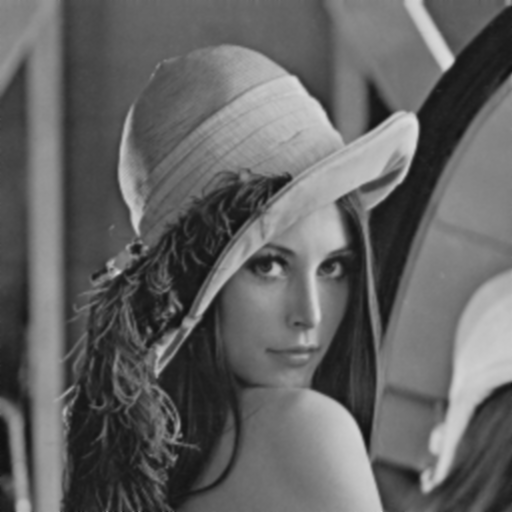

In [6]:
img = cv.imread('lena.png',0)
rows,cols=img.shape
print(img.dtype)
for l in range (1,rows-1):
  for c in range (1,cols-1):
    img[l,c]=(img[l-1,c-1].astype(np.int16)+img[l-1,c].astype(np.int16)+img[l-1,c+1].astype(np.int16)+
              img[l,c-1].astype(np.int16)+img[l,c].astype(np.int16)+img[l,c+1].astype(np.int16)+
              img[l+1,c-1].astype(np.int16)+img[l+1,c].astype(np.int16)+img[l+1,c+1].astype(np.int16))/9
cv2_imshow(img)

O processo de calcular a convolução nos bordos da imagem é que não temos valores associados aos pixels de fora da imagem. Para isto, podemos colocar uma "moldura" em torno da imagem.

O código abaixo irá colocar uma moldura de 1 pixel em torno da imagem.




(514, 514)


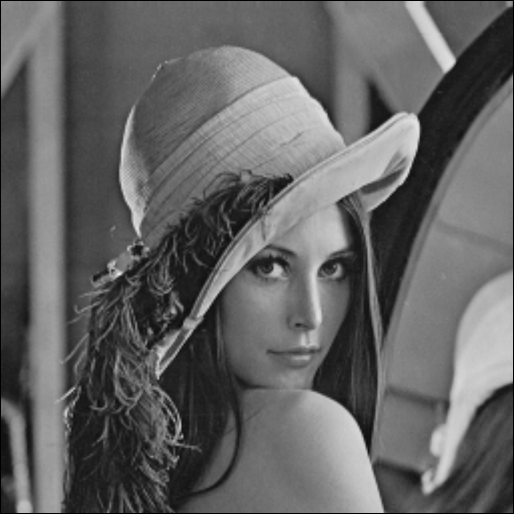

In [10]:
img = cv.imread('lena.png',0)
rows, cols = img.shape
T = np.float32([ [1,0,1], 
                 [0,1,1] ])
imgt= cv.warpAffine(img, T, (cols+2, rows+2))
print(imgt.shape) 
cv2_imshow(imgt)

**EXERCÍCIO**

Implemente novamente o produto de convolução, porém agora usando uma matriz com moldura.


(512, 512)


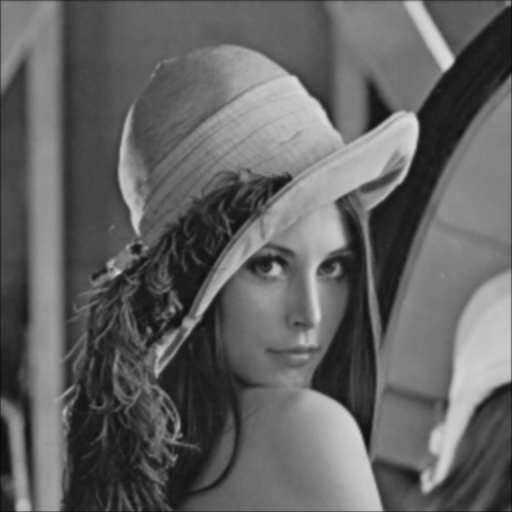

In [36]:
rows, cols = imgt.shape
for l in range (1,rows-1):
  for c in range (1,cols-1):
    imgt[l,c]=(imgt[l-1,c-1].astype(np.int16)+imgt[l-1,c].astype(np.int16)+imgt[l-1,c+1].astype(np.int16)+
              imgt[l,c-1].astype(np.int16)+imgt[l,c].astype(np.int16)+imgt[l,c+1].astype(np.int16)+
              imgt[l+1,c-1].astype(np.int16)+imgt[l+1,c].astype(np.int16)+imgt[l+1,c+1].astype(np.int16))/9
img=imgt[1:-1,1:-1]
print(img.shape)
cv2_imshow(img)

**FILTROS PARA BLURRING**

O filtro de **blurring (borramento)** consiste na  perda gradual de foco da imagem, produzindo a sensação que ela está borrada. 

Existem diversos métodos para construções de kernels para blurring:


*   **filtro da média (box filter)**: blur = cv.blur(img,(5,5))
*   **filtro gaussiano**: blur = cv.GaussianBlur(img,(5,5),0)
*   **filtro da mediana**: blur = cv.medianBlur(img,5)
*   **filtro bilateral**: blur = cv.bilateralFilter(img,9,75,75)



**EXERCÍCIO**

Compare os resultados dos filtros de blurring apresentados acima.

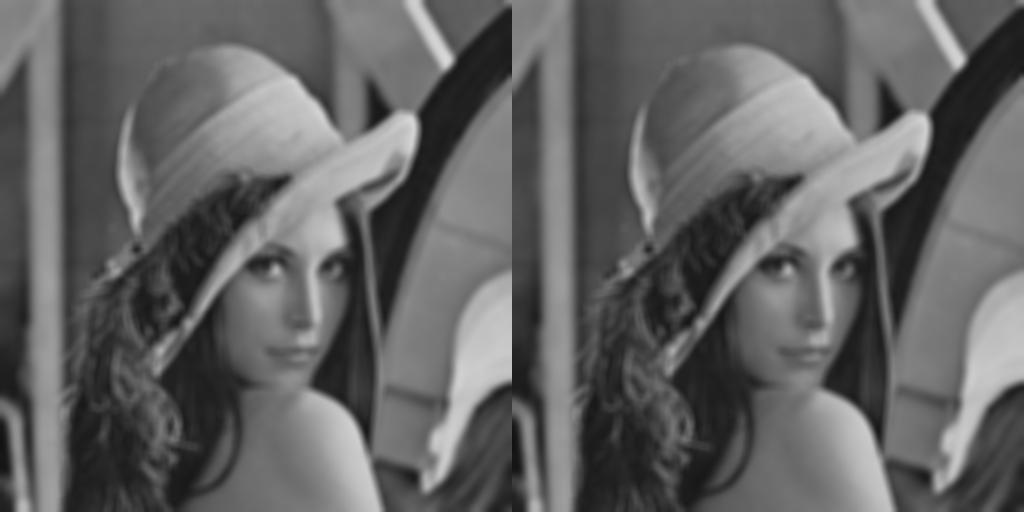

In [15]:
img = cv.imread('lena.png',0)
blur=cv.blur(img,(9,9))
gauss=cv.GaussianBlur(img,(9,9),40)
cv2_imshow(np.hstack((blur,gauss)))



**EXERCÍCIO**

Abaixo, temos as formas matriciais dos filtrosda média (box) e gaussiano. Reaplique estes dois filtros na imagem lena.jpg, porém agora usando um produto de convolução diretamente com os kernels mostrados abaixo.

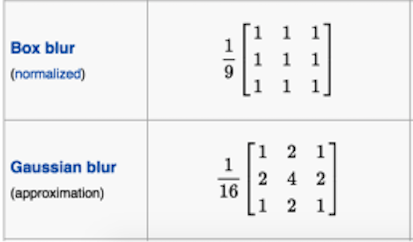

In [13]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.imread('filters.png')
cv2_imshow(img)

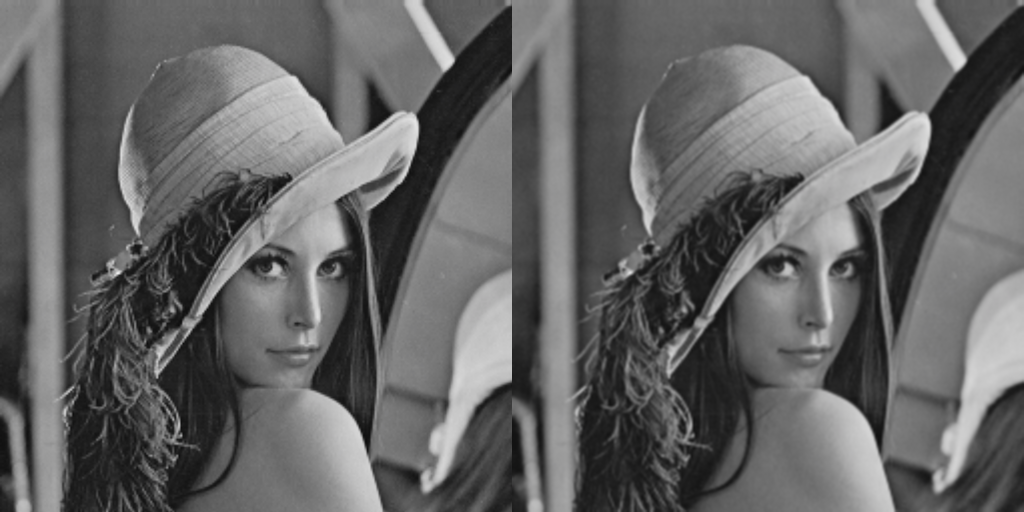

In [4]:
img = cv.imread('lena.png')
blur =np.array([[1/9,1/9,1/9],
                [1/9,1/9,1/9],
                [1/9,1/9,1/9]])
imgf = cv.filter2D(img,-1,blur)
cv2_imshow(np.hstack((img,imgf)))

**EXERCÍCIO**

Uma das aplicações importantes dos filtros de blurring consiste na atenuação de ruído (noise) em imagens. Considerando a imagem com ruído abaixo, verifique quais dos filtros anteriores consegue atenuar de maneira mais efetiva o ruído.

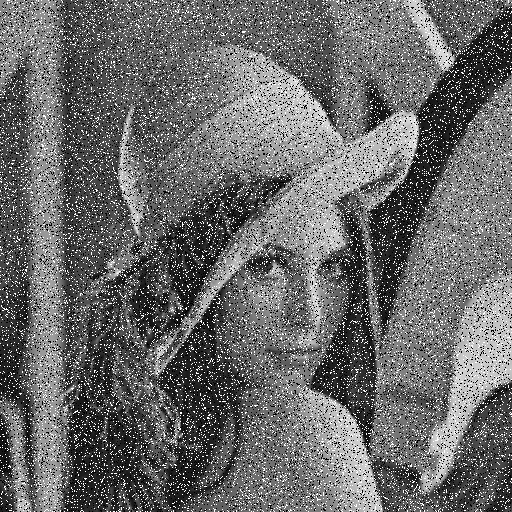

In [22]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import random

def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

img = cv.imread('lena.png',0)
img=sp_noise(img,0.1)
cv2_imshow(img)

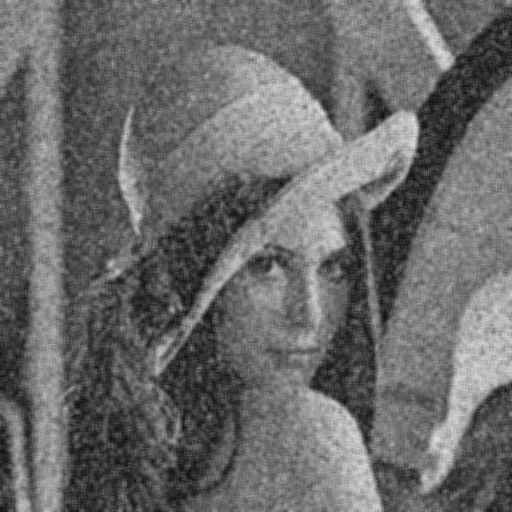

In [23]:
cv2_imshow(cv.blur(img,(5,5)))

**FILTRO DE SHARPENING**

O filtro de **sharpening** consiste no ganho gradual de foco de uma imagem, produzindo a sensação que ela está cada vez mais bem definida. É uma aproximação da inversa do filtro de blurring. 

Abaixo, temos uma forma matricial do filtro de sharpening.

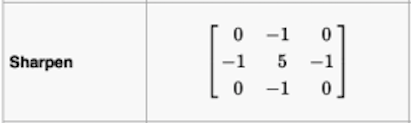

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.imread('sharpen.png')
cv2_imshow(img)

**EXERCÍCIO**

Implemente o filtro de sharpening através de um produto de convolução em OpenCV.

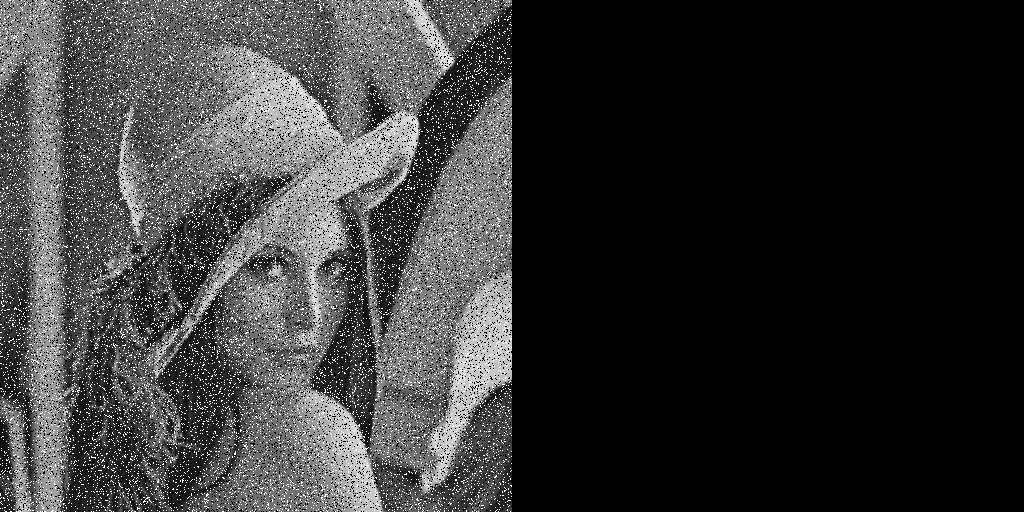

In [26]:
img = cv.imread('lena.png',0)
img=sp_noise(img,0.1)


blur=cv.blur(img,(5,5))



kernel =np.array([[0,-2,0],
                [-2,5,-2],
                [0,-2,0]])
imgf = cv.filter2D(blur,-1,kernel)
cv2_imshow(np.hstack((img,imgf)))

**EXERCÍCIO**

Modique os pesos presentes no kernel do filtro de sharpening para verificar seus efeitos.

In [ ]:
#implemente sua solução aqui